## 1. Load and Preview Data

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Memuat dataset dari file Excel
df = pd.read_excel('data.xls')

# Menampilkan 5 baris pertama dari dataset
display(df.head())

# Menampilkan informasi umum tentang dataset
df.info()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## 2. Basic Summary Statistics

In [3]:
# Menghasilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


**Dokumentasi dan Interpretasi Hasil**

- **Struktur Data**: Dataset ini terdiri dari 9,994 baris dan 21 kolom, mencakup informasi detail mengenai setiap transaksi seperti Order ID, Order Date, dan metrik finansial (`Sales`, `Profit`, `Discount`)

## 3. Missing Value Analysis

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


<Axes: >

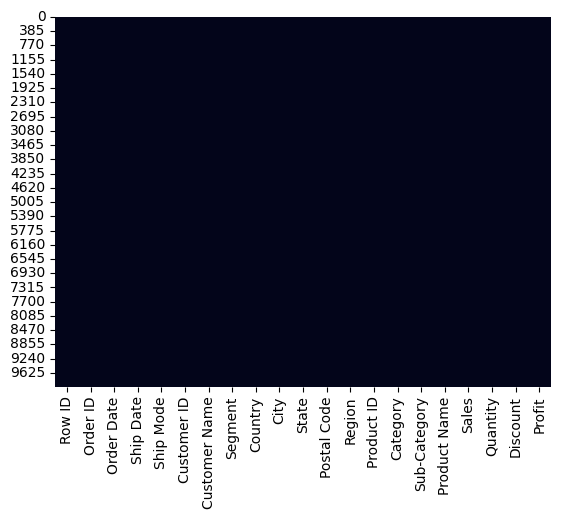

In [4]:
import seaborn as sns

# Your code here
print(df.isnull().sum())

sns.heatmap(df.isnull(),cbar=False)


## 4. Time Series Decomposition

In [5]:
# Data Preprocessing
# Mengatur 'Order Date' sebagai index dan memastikan tipenya adalah datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resampling data ke frekuensi mingguan ('W')
weekly_df = pd.DataFrame()
weekly_df['Sales'] = df['Sales'].resample('W').sum()
weekly_df['Quantity'] = df['Quantity'].resample('W').sum()
weekly_df['Discount'] = df['Discount'].resample('W').mean()

# Mengisi nilai NaN yang mungkin muncul setelah resampling dengan 0
weekly_df.fillna(0, inplace=True)

print("Data Setelah Resampling Mingguan:")
display(weekly_df.head())

Data Setelah Resampling Mingguan:


,Sales,Quantity,Discount
Order Date,,,
2014-01-05,324.044,13,0.320000
2014-01-12,4599.572,49,0.112500
2014-01-19,4509.127,99,0.229545
2014-01-26,3842.388,108,0.034483
2014-02-02,1642.310,33,0.131818


In [10]:
from statsmodels.tsa.seasonal import STL
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Melakukan dekomposisi STL pada data penjualan mingguan
# Periode musiman (seasonal) diatur ke 52 untuk pola tahunan dalam data mingguan
stl = STL(weekly_df['Sales'], seasonal=53)
result = stl.fit()

# Membuat visualisasi interaktif dengan Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=("Data Asli (Sales)", "Tren (Trend)", "Musiman (Seasonal)", "Residual (Resid)"))

fig.add_trace(go.Scatter(x=result.observed.index, y=result.observed, name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, name='Residual', mode='markers'), row=4, col=1)

fig.update_layout(height=800, title_text="<b>Dekomposisi STL pada Penjualan Mingguan</b>")
fig.show()

**Dokumentasi Time Series Decomposition dengan STL**
STL (Seasonal and Trend decomposition using Loess)

STL adalah metode dekomposisi yang efektif untuk memisahkan data time series menjadi tiga komponen utama:
1. **Trend**: Arah pergerakan data dalam jangka panjang.
2. **Seasonal**: Pola berulang yang terjadi pada frekuensi tetap.
3. **Residual**: Sisa atau "noise" dari data setelah komponen tren dan musiman dihilangkan.

Metode ini digunakan karena lebih unggul daripada "seasonal_decompose" yang lebih klasik. Karena lebih tahan terhadap outlier dan memungkinkan komponen musiman untuk berubah seiring waktu.

**Interpretasi Hasil Dekomposisi**
Visualisasi hasil memberikan beberapa insight penting:
- **Tren**: Terlihat jelas adanya tren pertumbuhan penjualan jangka panjang yang positif dan konsisten dari tahun ke tahun.
- **Seasonal**: Terdapat pola musiman tahunan yang kuat, di mana penjulana cenderung memuncak pada akhir tahun dan melandari di periode lain.
- **Residual**: Komponene residual tampak acak dan terpusat di sekitar nol, mengindikasikan bahwa model dekomposisi berhasil menangkap sebagian besar pola tren dan musiman.

## 5. Feature Engineering with Time

**Dokumentasi Metode**
Feature Engineering.

Membuat fitur berbasis waktu dan fitur penanda hari libur (holiday) untuk memberikan konteks bisnis yang lebih "rich" kepada model.

In [18]:
# Membuat fitur berbasis waktu dari index
weekly_df['day'] = weekly_df.index.day
weekly_df['weekday'] = weekly_df.index.weekday
weekly_df['month'] = weekly_df.index.month
weekly_df['is_weekend'] = weekly_df['weekday'].isin([5, 6])

# --- Membuat Fitur Penanda Hari Libur (Holiday Features) ---

# Mendefinisikan tanggal-tanggal hari libur utama
black_friday_dates = pd.to_datetime(['2014-11-28', '2015-11-27', '2016-11-25', '2017-11-24'])
christmas_dates = pd.to_datetime(['2014-12-25', '2015-12-25', '2016-12-25', '2017-12-25'])
easter_dates = pd.to_datetime(['2014-04-20', '2015-04-05', '2016-03-27', '2017-04-16'])

# Mengidentifikasi holiday berdasarkan (tahun, nomor_minggu)
bf_weeks = set(zip(black_friday_dates.isocalendar().year, black_friday_dates.isocalendar().week))
xmas_weeks = set(zip(christmas_dates.isocalendar().year, christmas_dates.isocalendar().week))
easter_weeks = set(zip(easter_dates.isocalendar().year, easter_dates.isocalendar().week))

# Membuat tuple (tahun, nomor_minggu) untuk setiap baris di weekly_df
df_weeks = list(zip(weekly_df.index.isocalendar().year, weekly_df.index.isocalendar().week))

# Membuat kolom biner (0 atau 1) sebagai penanda
weekly_df['is_black_friday_week'] = [w in bf_weeks for w in df_weeks]
weekly_df['is_christmas_week'] = [w in xmas_weeks for w in df_weeks]
weekly_df['is_easter_week'] = [w in easter_weeks for w in df_weeks]
weekly_df[['is_black_friday_week', 'is_christmas_week', 'is_easter_week']] = weekly_df[['is_black_friday_week', 'is_christmas_week', 'is_easter_week']].astype(int)

print("DataFrame dengan Fitur Baru:")
display(weekly_df.tail())

DataFrame dengan Fitur Baru:


,Sales,Quantity,Discount,day,weekday,month,is_weekend,is_black_friday_week,is_christmas_week,is_easter_week
Order Date,,,,,,,,,,
2017-12-03,32354.5700,564,0.169231,3,6,12,True,0,0,0
2017-12-10,24006.9580,480,0.115267,10,6,12,True,0,0,0
2017-12-17,10495.9630,267,0.133117,17,6,12,True,0,0,0
2017-12-24,23662.3640,372,0.126768,24,6,12,True,0,0,0
2017-12-31,8977.8318,233,0.188358,31,6,12,True,0,1,0


## 6. Forecast with ARIMA

**Dokumentasi Metode: SARIMAX**
SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) adalah metode statistik untuk peramalan time series data. Model ini merupakan pengembangan dari ARIMA dengan kemampuan menangani pola musiman (S) dan memasukkan variabel external (X) sebagai prediktor.

**Fungsi `auto_arima`**

Fungsi `auto_arima` dari pustaka pmdarima adalah sebuah alat bantu yang mengotomatiskan proses pencarian parameter terbaik untuk model SARIMAX. Daripada menentukan parameter (p,d,q)(P,D,Q) secara manual, fungsi ini melakukannya secara sistematis.

Proses yang dilakukan oleh `auto_arima` meliputi:

- Uji Stasioneritas Otomatis: Melakukan uji stasioneritas untuk menentukan orde diferensiasi non-musiman (d) dan musiman (D) yang diperlukan.
- Pencarian Parameter: Mencari berbagai kombinasi parameter p, q (orde non-musiman) dan P, Q (orde musiman) secara efisien.
- Seleksi Model: Mengevaluasi setiap model yang diuji menggunakan Akaike Information Criterion (AIC) dan memilih model dengan nilai AIC terendah sebagai kandidat terbaik.

Dengan menggunakan `auto_arima`, proses pemilihan model menjadi lebih cepat dan objektif, mengurangi subjektivitas yang muncul dari interpretasi plot ACF/PACF secara manual.

In [21]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y = weekly_df['Sales']
features = ['Quantity', 'Discount', 'month', 'is_black_friday_week', 'is_christmas_week', 'is_easter_week']
x = weekly_df[features]


# Train-test split
train_size = int(len(weekly_df) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
x_train, x_test = x[:train_size], x[train_size:]

# Mencari model SARIMAX terbaik dengan auto_arima
# auto_arima akan mencoba berbagai kombinasi parameter untuk menemukan model terbaik
model = pm.auto_arima(
    y=y_train,
    X=x_train,
    seasonal=True,
    m=52, # Periode musiman untuk data mingguan
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    start_P=0, start_Q=0,
    max_P=5, max_Q=5,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
)

print("Model SARIMAX terbaik ditemukan:")
print(model.summary())

# Forecasting
forecasts, conf_int = model.predict(
    n_periods=len(y_test),
    X=x_test,
    return_conf_int=True
)

# --- Visualisasi Interaktif ---
fig_sarimax = go.Figure()
fig_sarimax.add_trace(go.Scatter(x=y_test.index, y=y_test, name='Data Aktual (Test)', mode='lines', line=dict(color='orange')))
fig_sarimax.add_trace(go.Scatter(x=y_test.index, y=forecasts, name='Peramalan SARIMAX', mode='lines', line=dict(color='green')))
fig_sarimax.add_trace(go.Scatter(x=y_test.index, y=conf_int[:, 0], fill=None, mode='lines', line=dict(color='lightgreen'), showlegend=False))
fig_sarimax.add_trace(go.Scatter(x=y_test.index, y=conf_int[:, 1], fill='tonexty', mode='lines', line=dict(color='lightgreen'), name='Interval Kepercayaan 95%'))

fig_sarimax.update_layout(title_text="<b>Peramalan SARIMAX vs. Data Aktual (Interaktif)</b>", xaxis_title="Tanggal", yaxis_title="Penjualan Mingguan")
fig_sarimax.show()

# --- Metrik Evaluasi ---
mae_sarimax = mean_absolute_error(y_test, forecasts)
mape_sarimax = mean_absolute_percentage_error(y_test, forecasts)
print(f"MAE SARIMAX: ${mae_sarimax:,.2f}")
print(f"MAPE SARIMAX: {mape_sarimax:.2%}")

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3250.002, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3253.037, Time=0.80 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3252.673, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3248.116, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=3251.984, Time=0.46 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=3251.979, Time=1.06 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=3251.072, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=3250.719, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=3249.640, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[52]          
Total fit time: 5.787 seconds
Model SARIMAX terbaik ditemukan:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  167
Model:                 

MAE SARIMAX: $4,215.85
MAPE SARIMAX: 34.93%


**Interpretasi Hasil Model SARIMAX**
1. Model Terbaik yang Dipilih
Model optimal yang ditemukan adalah SARIMAX(0, 0, 0)x(0, 0, 0)[52].

- (p,d,q) = (0,0,0): Ini adalah bagian non-musiman. Hasil ini menunjukkan bahwa setelah memperhitungkan pola musiman, tidak ada komponen AutoRegressive (AR), Integreated (differencing), atau Moving Average (MA) yang diperlukan. Angka tersebut berarti fluktuasi data dari minggu ke minggu (di luar musim) bersifat acak.
- (P, D, Q, m) = (0, 0, 0, 52): Ini adalah bagian musiman dan merupakan inti dari model ini. Model ini juga tidak memerlukan komponen ARIMA musiman (P, D, Q). Namum, parameter m=52 menunjukkan bahwa model tetap menyadari adanya siklus tahunan (52 minggu) dalam data.

**Key Insight: Peran Variabel Eksternal (X)**
Alasan utama mengapa semua parameter ARIMA bernilai nol adalah karena variabel eksogen (X) sudah sangat efektif dalam menjelaskan variasi dan pola dalam data penjualan.

Fitur-fituer seperti `Quantity`, `Discount`, `month`, `is_black_friday`, `is_christmas_week`, `is_easter_week` telah berhasil menangkap pola tren dan musiman, sehingga model tidak perlu lagi menggunakan komponen ARIMA yang kompleks.

## 7. Build Forecasting Model with Prophet 

**Dokumentasi Metode: Prophet**
 adalah library forecasting dari Meta (Facebook) yang dirancang untuk menjadi intuitif dan robust, terutama untuk data bisnis yang memiliki pola musiman kuat disertai dengan efek hari libur. Prophet secara otomatis mendeteksi tren, perubahan tren (changepoints), serta pola musiman mingguan dan tahunan.

In [26]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
from prophet import Prophet

# --- Persiapan Data untuk Prophet ---
# Prophet memerlukan kolom 'ds' (datestamp) dan 'y' (target)
prophet_df = pd.DataFrame()

prophet_df['ds'] = weekly_df.index
prophet_df['y'] = weekly_df['Sales'].values

prophet_df['Quantity'] = weekly_df['Quantity'].values
prophet_df['Discount'] = weekly_df['Discount'].values
prophet_df['month'] = weekly_df['month'].values

# Mendefinisikan hari libur (costum holidays)
holiday_df = pd.DataFrame({
    'holiday': 'black_friday',
    'ds': black_friday_dates,
    'lower_window': 0,
    'upper_window': 2
})

# Train Test Split
train_size = int(len(prophet_df) * 0.8)
train = prophet_df[:train_size]
test = prophet_df[train_size:]

# --- Konfigurasi dan Pelatihan Model ---
model_prophet = Prophet(
    holidays=holiday_df,
    yearly_seasonality=True,
    weekly_seasonality=False, # Data sudah mingguan
    daily_seasonality=False
)
model_prophet.add_country_holidays(country_name='US') # Menambahkan hari libur standar AS
model_prophet.add_regressor('Quantity')
model_prophet.add_regressor('Discount')
model_prophet.add_regressor('month')

model_prophet.fit(train)

# --- Forecasting dan Evaluasi ---
# Membuat dataframe 'future' yang berisi tanggal untuk peramalan
future = model_prophet.make_future_dataframe(periods=len(test), freq='W')
future = pd.merge(future, prophet_df.drop(columns='y'), on='ds', how='left') # Menambahkan data regressor
forecast_prophet = model_prophet.predict(future)

# --- Visualisasi Interaktif ---
# Gunakan plot bawaan Prophet yang sudah interaktif

print("Prophet Forecast, Plot Interaktif:")
fig1 = plot_plotly(model_prophet, forecast_prophet)
fig1.show()

# Create the components plot (interactive)
print("\nProphet Components Plot, Interaktif:")
fig2 = plot_components_plotly(model_prophet, forecast_prophet)
fig2.show()

print("\nPlot Interaktif Perbandingan:")
fig_custom = go.Figure()

forecast_test_period = forecast_prophet.iloc[-len(test):]

fig_custom.add_trace(go.Scatter(
    x=forecast_test_period['ds'],
    y=forecast_test_period['yhat_lower'],
    fill=None,
    mode='lines',
    line=dict(color='lightgreen'),
    showlegend=False
))
fig_custom.add_trace(go.Scatter(
    x=forecast_test_period['ds'],
    y=forecast_test_period['yhat_upper'],
    fill='tonexty',
    mode='lines',
    line=dict(color='lightgreen'),
    name='95% Confidence Interval'
))

fig_custom.add_trace(go.Scatter(
    x=test['ds'],
    y=test['y'],
    name='Actual Values (Test)',
    mode='lines',
    line=dict(color='orange')
))

fig_custom.add_trace(go.Scatter(
    x=forecast_test_period['ds'],
    y=forecast_test_period['yhat'],
    name='Prophet Forecast',
    mode='lines',
    line=dict(color='green')
))

fig_custom.update_layout(
    title_text="<b>Prophet Forecast vs. Actual Values (Test Period)</b>",
    xaxis_title="Date",
    yaxis_title="Weekly Sales",
    legend=dict(x=0.01, y=0.99)
)

fig_custom.show()

# --- Metrik Evaluasi ---
y_forecast_prophet = forecast_prophet.iloc[-len(test):]['yhat']
y_test_prophet = test['y']
mae_prophet = mean_absolute_error(y_test_prophet, y_forecast_prophet)
mape_prophet = mean_absolute_percentage_error(y_test_prophet, y_forecast_prophet)
print(f"MAE Prophet: ${mae_prophet:,.2f}")
print(f"MAPE Prophet: {mape_prophet:.2%}")

20:07:12 - cmdstanpy - INFO - Chain [1] start processing
20:07:12 - cmdstanpy - INFO - Chain [1] done processing


Prophet Forecast, Plot Interaktif:



Prophet Components Plot, Interaktif:



Plot Interaktif Perbandingan:


MAE Prophet: $4,399.99
MAPE Prophet: 35.51%


**Interpretasi Hasil Model Prophet**
Analisis ini didasarkan pada visualisasi forecast dan dekomposisi komponen yang dihasilkan oleh model Prophet.

**Analisis Plot Forecast**
Berdasarkan plot forecast utama, model Prophet berhasil menangkap **pola umum dan ritme musiman** dari data penjualan mingguan. Garis forecast (`yhat`) secara umum mengikuti pergerakan data historis dan data aktual pada periode pengujian.
Namun, terlihat bahwa forecast cenderung lebih mulus dibandingkan data aktual yang sangat fluktuatif. Model ini berhasil memprediksi kapan puncak penjualan akan terjadi, tetapi seringkali kurang presisi dalam memprediksi magnitudo atau ketinggian puncak tersebut. Hal ini menghasilkan nilai evaluasi sebagai berikut:

**Dekomposisi Komponen Model**
Plot komponen memberikan wawasan yang sangat berharga mengenati faktor-faktor yang mendorong penjualan:
- Trend: Model mengidentifikasi adanya perubahan tren dalam data. Terdapat pertumbuhan positif hingga pertengahan tahun 2016, yang kemudian diikuti oleh perlambatan dan sedikit penurunan tren hingga akhir periode. Ini mengindikasikan adanya perubahan pada laju pertumbuhan bisnis inti.
- Efek Holidays: Komponen ini menunjukkan dampak yang sangat signifikan dan positif dari hari libur terhadap penjualan. Puncak-puncak tertinggi pada komponen ini bertepatan dengan hari libur yang telah didefinisikan (seperti Black Friday dan hari libur AS lainnya), yang membuktikan bahwa penambahan fitur ini sangat krusial.
- Musiman Tahunan (Yearly Seasonality): Teridentifikasi pola tahunan yang jelas, di mana penjualan cenderung memuncak pada akhir tahun (November-Desember) dan berada pada titik terendah pada awal tahun (Februari-Maret).
- Regresor Tambahan (Extra Regressors): Fitur tambahan yang Anda berikan (Quantity, Discount, month) secara kolektif memberikan kontribusi terhadap hasil akhir forecast.


## **Perbandingan Model**
| Model | MAE (Mean Absolute Error) | MAPE (Mean Absolute Percentage Error) |
|---|---|---|
| **SARIMAX** | \$4,215.85 | 34.93% |
| **Prophet** | \$4,399.99 | 35.51% |

Kedua model menunjukkan performa yang sangat kompetitif dan serupa. Ini mengindikasikan bahwa fitur rekayasa berhasil memberikan informasi krusial kepada kedua model.